In [1]:
#AUTO-ENCODER EXAMPLES


import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#%matplotlib inline
from keras.layers import Input,Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential


from keras.datasets import mnist, fashion_mnist
 

Using TensorFlow backend.


## Import data

In [2]:
################################################################################################
# DATA
# http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
#http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
################################################################################################
# PLOT FUNCTION
#-----------------
def plt_results(images, test_images):
 plt.figure(figsize=(15, 3))
 for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
 plt.tight_layout()
 plt.show()
   


SIMPLE AUTOENCODER

*********************
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 58us/step - loss: 0.0481 - val_loss: 0.0273
Epoch 2/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0243 - val_loss: 0.0224
Epoch 3/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.0209 - val_loss: 0.0201
Epoch 4/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.0193 - val_loss: 0.0189
Epoch 5/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.0183 - val_loss: 0.0181
Epoch 6/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0176 - val_loss: 0.0176
Epoch 7/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 8/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.0169 - val_loss: 0.0169
Epoch 9/20
48000/48000 [==============================] - 2s 48us/s

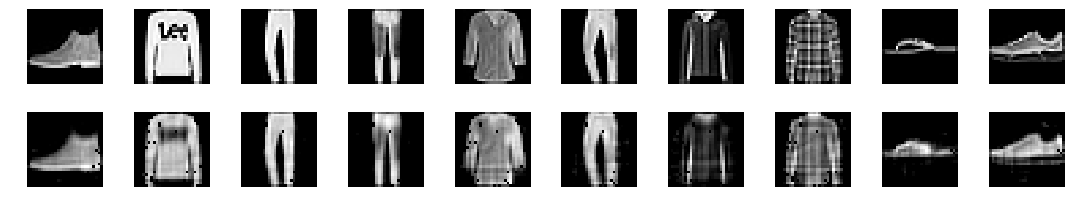

In [3]:
################################################################################################
 
print("\nSIMPLE AUTOENCODER\n")
print("*********************")
      
################################################################################################
###############################################################################################

(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

INPUT_SIZE = 784
ENCODING_SIZE = 64
 
input_img = Input(shape=(INPUT_SIZE,))
encoded = Dense(ENCODING_SIZE, activation='relu')(input_img)
decoded = Dense(INPUT_SIZE, activation='relu')(encoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True, validation_split=0.2)

decoded_imgs = autoencoder.predict(X_test)
#------------------
# Plot Results
#------------------
plt_results(decoded_imgs, X_test)

################################################################################################


CONVOLUTIONAL AUTOENCODER

****************************
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 76s 2ms/step - loss: 0.0434 - val_loss: 0.0254
Epoch 2/20
48000/48000 [==============================] - 75s 2ms/step - loss: 0.0227 - val_loss: 0.0209
Epoch 3/20
48000/48000 [==============================] - 74s 2ms/step - loss: 0.0198 - val_loss: 0.0191
Epoch 4/20
48000/48000 [==============================] - 74s 2ms/step - loss: 0.0183 - val_loss: 0.0178
Epoch 5/20
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0174 - val_loss: 0.0171
Epoch 6/20
48000/48000 [==============================] - 76s 2ms/step - loss: 0.0167 - val_loss: 0.0165
Epoch 7/20
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0161 - val_loss: 0.0159
Epoch 8/20
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0157 - val_loss: 0.0155
Epoch 9/20
48000/48000 [=============================

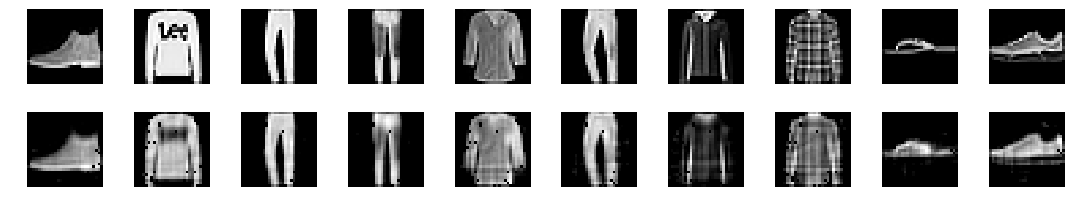

In [4]:
################################################################################################

print("\nCONVOLUTIONAL AUTOENCODER\n")
print("****************************")

################################################################################################

 
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

c_autoencoder = Sequential()
c_autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
c_autoencoder.add(MaxPooling2D((2, 2), padding='same'))
c_autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
c_autoencoder.add(MaxPooling2D((2, 2), padding='same'))
c_autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
# our encoding
c_autoencoder.add(MaxPooling2D((2, 2), padding='same'))
 
c_autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
c_autoencoder.add(UpSampling2D((2, 2)))
c_autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
c_autoencoder.add(UpSampling2D((2, 2)))
c_autoencoder.add(Conv2D(32, (3, 3), activation='relu'))
c_autoencoder.add(UpSampling2D((2, 2)))
c_autoencoder.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

c_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
c_autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True, validation_split=0.2)

cae_decoded_imgs = c_autoencoder.predict(X_test)

#------------------
# Plot Results
#------------------
plt_results(cae_decoded_imgs, X_test)

################################################################################################


DENOISING AUTOENCODER

****************************
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 94s 2ms/step - loss: 0.3339 - val_loss: 0.3105
Epoch 2/2
60000/60000 [==============================] - 94s 2ms/step - loss: 0.3054 - val_loss: 0.3061


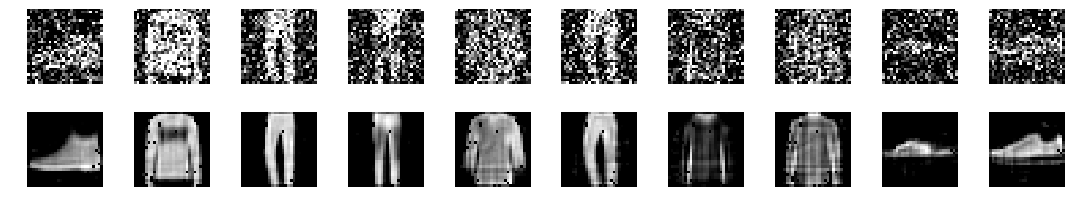

In [5]:
################################################################################################

print("\nDENOISING AUTOENCODER\n")
print("****************************")

################################################################################################
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



input_img = keras.Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded =Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

n_autoencoder = keras.Model(input_img, decoded)
n_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
nae_ecoded_imgs = n_autoencoder.fit(x_train_noisy, x_train,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

#------------------
# Plot Results
#------------------
plt_results(nae_ecoded_imgs,x_test_noisy)

################################################################################################
